In [14]:
import matplotlib.pyplot as plt
import statistics

In [2]:
# Upload file
from google.colab import files
uploaded = files.upload()

# data = pd.read_csv('https://raw.githubusercontent.com/amanda-araujo/inferencia-estatistica/main/desempenho.csv', sep = ';')

Saving width.txt to width.txt
Saving size.txt to size.txt
Saving length.txt to length.txt


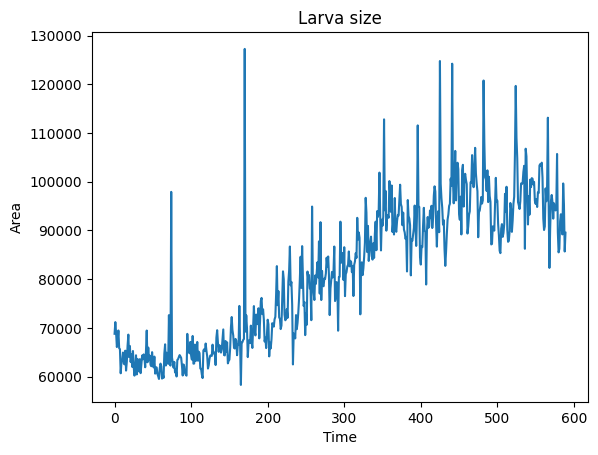

In [34]:
# Read the file
with open('/content/size.txt', 'r') as f:
    data = f.read().splitlines()

# Convert each line to an integer
size_data = [float(line) for line in data]

# Create a list of indices
indices = list(range(len(size_data)))

# Plot the data
plt.plot(indices, size_data)

# Optionally set the title and labels
plt.title('Larva size')
plt.xlabel('Time')
plt.ylabel('Area')

# Display the plot
plt.show()

In [15]:
statistics.mean([2,3])

2.5

[74, 165, 170, 174, 229, 233, 245, 258, 269, 292, 295, 321, 328, 346, 352, 396, 407, 421, 425, 441, 453, 482, 524, 536, 561, 566, 568, 578]


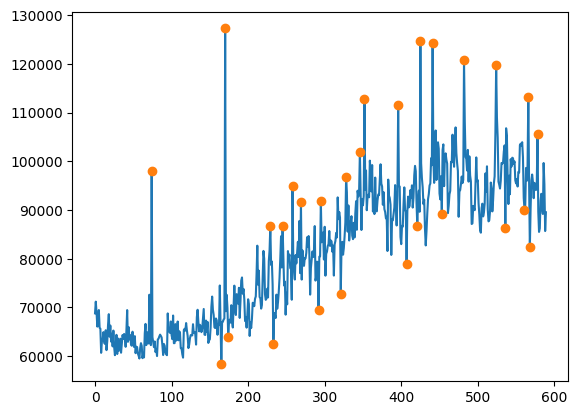

In [35]:
#mark the abnormal data

def get_average(data, index, window):
  if index == 0:
    return statistics.mean(data[index+1:index+window+1])
  elif index <= window:
    return statistics.mean(data[:index] + data[index+1:index+window+1])
  elif index < len(data)-window:
    return statistics.mean(data[index-window:index] + data[index+1:index+window+1])
  elif index < len(data)-1:
    return statistics.mean(data[index-window:index] + data[index+1:])
  else:
    return statistics.mean(data[index-window:index])

#moving_average = [get_average(size_data, index, 5) for index in range(len(size_data))]

abnormal_index_list = []
for i in range(len(size_data)):
  if abs(size_data[i] - get_average(size_data, i, 5)) > 10000:
    abnormal_index_list.append(i)

print(abnormal_index_list)

plt.plot(size_data)
plt.plot(abnormal_index_list, [size_data[index] for index in abnormal_index_list], 'o')

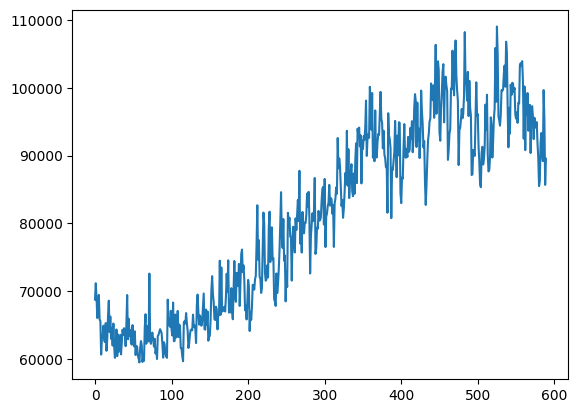

In [37]:
#replace abnormal data with close average

replaced_data = [0]*len(size_data)

for index in range(len(size_data)):
  if index in abnormal_index_list:
    replaced_data[index] = get_average(size_data, index, 5)
  else:
    replaced_data[index] = size_data[index]

plt.plot(replaced_data)

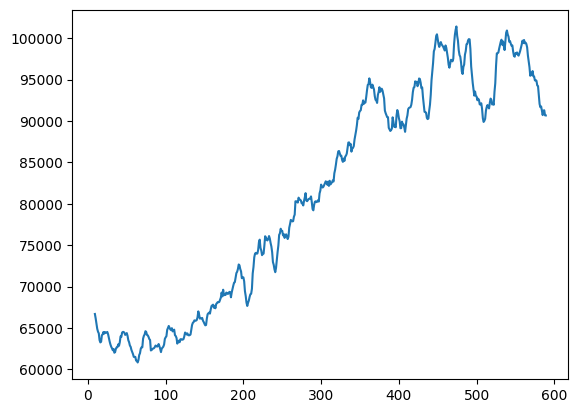

In [39]:
#calculate moving average

import pandas as pd
data_series = pd.Series(replaced_data)
moving_average = data_series.rolling(window=10).mean()

plt.plot(moving_average)

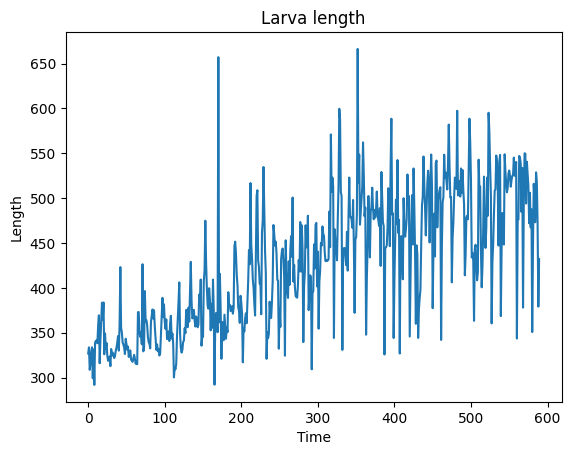

In [5]:
# Read the file
with open('/content/length.txt', 'r') as f:
    data = f.read().splitlines()

# Convert each line to an integer
data = [float(line) for line in data]

# Create a list of indices
indices = list(range(len(data)))

# Plot the data
plt.plot(indices, data)

# Optionally set the title and labels
plt.title('Larva length')
plt.xlabel('Time')
plt.ylabel('Length')

# Display the plot
plt.show()

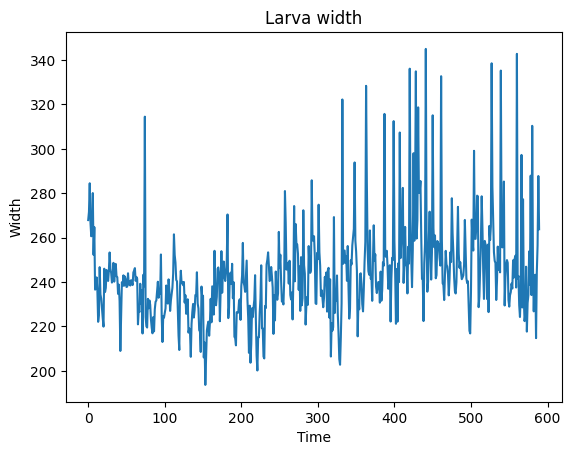

In [6]:
# Read the file
with open('/content/width.txt', 'r') as f:
    data = f.read().splitlines()

# Convert each line to an integer
data = [float(line) for line in data]

# Create a list of indices
indices = list(range(len(data)))

# Plot the data
plt.plot(indices, data)

# Optionally set the title and labels
plt.title('Larva width')
plt.xlabel('Time')
plt.ylabel('Width')

# Display the plot
plt.show()

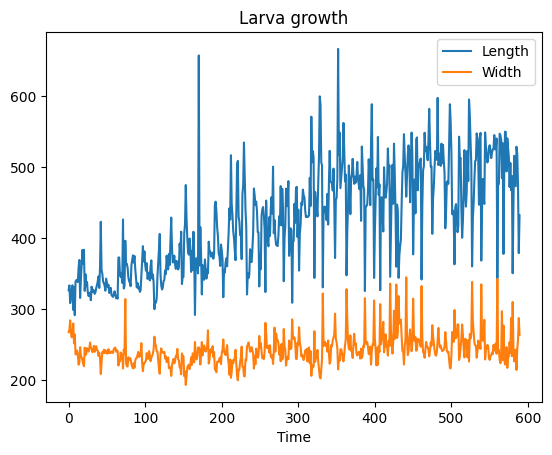

In [8]:
# Length and Width measures together

# Read the files
data = []

with open('/content/length.txt', 'r') as f:
    data.append(f.read().splitlines())
with open('/content/width.txt', 'r') as f:
    data.append(f.read().splitlines())

for i in range(len(data)):
  # Convert each line to an integer
  data[i] = [float(line) for line in data[i]]

# Create a list of indices
indices = list(range(len(data[0])))

# Plot the data
for i in range(len(data)):
  plt.plot(indices, data[i])

# Optionally set the title and labels
plt.title('Larva growth')
plt.xlabel('Time')
plt.ylabel('')

# Legend for the plot
plt.legend(['Length', 'Width'])

# Display the plot
plt.show()

Time-lapse: 1 pic

In [ ]:
type(indices[1])

int

In [ ]:
data[0]

[472.9541, 379.0818, 432.1478]